Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import requests
from collections import defaultdict
import os
from FunctionCaller import get_df_from_yelp
from FunctionCaller import get_df_from_foursquare

df1= pd.read_csv('yelp_data.csv')
df2 = pd.read_csv('foursquare_data.csv')

In [2]:
combined_df = pd.concat([df1, df2], axis=1)
combined_df

,name,yelp_latitude,yelp_longitude,yelp_address,name,foursquare_latitude,foursquare_longitude,foursquare_address
0,Hot Stone Pizza and Shawarma,43.258270,-79.843840,524 Barton Street ENone,DeRosa Bakery and Restaurant,43.253411,-79.845967,71 Sanford Ave N
1,Giuseppe's Italian Cuisine & Pizza,43.251340,-79.844675,762 King Street E,Starpolskie Delicacy,43.256666,-79.840720,711 Barton St E
2,Mendonça Café,43.259220,-79.846234,457 Barton Street E,Hello Baked,43.257945,-79.842280,549 Barton St E
3,sams tavern,43.256802,-79.838188,632 Barton Street E,541 | Eatery & Exchange,43.258283,-79.842245,541 Barton St E
4,Queen's Pizza & Wings,43.251130,-79.841230,838 King Street E,Giuseppe's Italian Cuisine & Pizza,43.251383,-79.844698,762 King St E
5,Maipai,43.257260,-79.838170,631 Barton Street ENone,Queen's Pizza & Wings,43.251084,-79.841309,838 King St E
6,Pho Asparagus,43.259739,-79.848888,387 Barton Street ENone,Little Caesars Pizza,43.251964,-79.848782,557 Main St E
7,BAB Korean Food & BBQ,43.260120,-79.848750,387 Barton Street ENone,East Side Mario's,43.259802,-79.847230,Queenston Rd
8,Traphouse Burgerz,43.252780,-79.852790,535 King Street ENone,Frank's Sicilia Bakery,43.256710,-79.836508,669 Barton St E
9,Narulas Express,43.252663,-79.852898,535 King Street EastNone,Mississippi Queen Foods,43.252535,-79.850084,635 King St E


In [4]:

bike_df = pd.read_csv('bike_data.csv')
bike_df

,name,latitude,longitude,num_of_bikes
0,Hess at king,43.259126,-79.877212,5
1,Bayfront Park,43.269288,-79.871327,6
2,Bay at Strachan,43.267859,-79.867923,1
3,Bay at Mulberry,43.263198,-79.871803,6
4,City Hall,43.256132,-79.874499,2
...,...,...,...,...
140,Main at Longwood,43.259604,-79.902103,5
141,Van Wagner's Beach,43.260008,-79.766388,6
142,King William at James,43.257635,-79.868487,0
143,Westdale Village - Paisley,43.261712,-79.905901,6


In [40]:
bike_name = bike_df['name'].values.tolist()
bike_lat = bike_df['latitude'].values.tolist()
bike_long = bike_df['longitude'].values.tolist()
number_of_bikes = bike_df['num_of_bikes'].values.tolist()

bike_info = list(zip(bike_name, bike_lat, bike_long, number_of_bikes))

def combine_with_bike_station_info(bike_info, query, radis="500"):
    all_df = pd.DataFrame()
    for bike_name, bike_lat, bike_long, number_of_bikes in bike_info:
        single_yelp_foursquare_df = combined_df
        # add bike station info 
        single_yelp_foursquare_df.insert(0, 'bike_station_name', bike_name)
        single_yelp_foursquare_df.insert(1, 'bike_station_lat', bike_lat)
        single_yelp_foursquare_df.insert(2, 'bike_station_long', bike_long)
        single_yelp_foursquare_df.insert(3, 'num_of_bikes', number_of_bikes)
        all_df = pd.concat([all_df, single_yelp_foursquare_df], ignore_index=True)
    return all_df
# combine_with_bike_station_info(list(bike_info[0]), "Restaurants", radis="500")
bike_info[0]

# the data getting from citybike api are too many, it takes too long to run. Here I get the first 50 instead and radis changes to 200.
df_test = combine_with_bike_station_info(bike_info[:50], 'Restaurants', radis="200")
df_test

,bike_station_name,bike_station_lat,bike_station_long,num_of_bikes,name,foursquare_latitude,foursquare_longitude,foursquare_address,yelp_latitude,yelp_longitude,yelp_address
0,Hess at king,43.259125842121065,-79.87721174955368,3,Coop Wicked Chicken Hamilton,43.259271,-79.877373,274 King St W,NaN,NaN,NaN
1,Hess at king,43.259125842121065,-79.87721174955368,3,Coop Hamilton,43.259153,-79.877446,274 King St W,NaN,NaN,NaN
2,Hess at king,43.259125842121065,-79.87721174955368,3,Papagayo,43.258893,-79.876474,246 King St W,NaN,NaN,NaN
3,Hess at king,43.259125842121065,-79.87721174955368,3,The Moghul's,43.259400,-79.876421,288 Mud St W,NaN,NaN,NaN
4,Hess at king,43.259125842121065,-79.87721174955368,3,Island Carribbean Takeout & Catering,43.258578,-79.876931,228 King St W,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
114,John at Main,43.254529435061336,-79.86718028783798,1,Sankofa Dining,43.253479,-79.866354,92 Jackson St E,NaN,NaN,NaN
115,John at Main,43.254529435061336,-79.86718028783798,1,Burrito Boyz,43.255691,-79.867215,66 King St E,NaN,NaN,NaN
116,John at Main,43.254529435061336,-79.86718028783798,1,Domino's Pizza,NaN,NaN,NaN,43.25429,-79.86600,96 Main Street E
117,John at Main,43.254529435061336,-79.86718028783798,1,Bad & Boujee,NaN,NaN,NaN,43.25332,-79.86739,93 John St SouthNone


In [41]:
# Checking the types of data
df_test.dtypes

bike_station_name        object
bike_station_lat         object
bike_station_long        object
num_of_bikes              int64
name                     object
foursquare_latitude     float64
foursquare_longitude    float64
foursquare_address       object
yelp_latitude           float64
yelp_longitude          float64
yelp_address             object
dtype: object

In [47]:
# Dropping irrelevant columns
df = df_test.drop(['bike_station_lat', 'bike_station_long', 'foursquare_latitude', 'foursquare_longitude', 'yelp_latitude', 'yelp_longitude'], axis=1)
df.head(5)

,bike_station_name,num_of_bikes,name,foursquare_address,yelp_address
0,Hess at king,3,Coop Wicked Chicken Hamilton,274 King St W,NaN
1,Hess at king,3,Coop Hamilton,274 King St W,NaN
2,Hess at king,3,Papagayo,246 King St W,NaN
3,Hess at king,3,The Moghul's,288 Mud St W,NaN
4,Hess at king,3,Island Carribbean Takeout & Catering,228 King St W,NaN


In [48]:
# Renaming the columns
df = df.rename(columns={ "name" : "restaurant_name"})
df.head(5)

,bike_station_name,num_of_bikes,restaurant_name,foursquare_address,yelp_address
0,Hess at king,3,Coop Wicked Chicken Hamilton,274 King St W,NaN
1,Hess at king,3,Coop Hamilton,274 King St W,NaN
2,Hess at king,3,Papagayo,246 King St W,NaN
3,Hess at king,3,The Moghul's,288 Mud St W,NaN
4,Hess at king,3,Island Carribbean Takeout & Catering,228 King St W,NaN


In [49]:
# Dropping the duplicate rows
df.shape

(119, 5)

In [50]:
# no duplicates
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(0, 5)

In [53]:
# Dropping the missing or null values
missing_values_sum = df.isnull().sum()
print(missing_values_sum)

bike_station_name      0
num_of_bikes           0
restaurant_name        0
foursquare_address    33
yelp_address          86
dtype: int64


The missing values, 33 and 86, are too many compared to the total number of 119. It is not possible to drop all the missing values. After checking all the missing values in foursquare_address and yelp_address columns, the missing vlues represents that the restaurant getting from one api cannot be retrived from the other one. So, I have to keep all of them.

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [91]:
# Serialize to CSV
df.to_csv('data_raw.csv', index=False)
# count the num of nearby bars for the given bike station
num_bars_per_station = df.groupby('bike_station_name').count()
num_bars_per_station


,num_of_bikes,restaurant_name,foursquare_address,yelp_address
bike_station_name,,,,
Bay at Mulberry,2,2,2,0
Bay at Strachan,1,1,1,0
Cootes Drive Dundas,4,4,3,1
Dundurn at Aberdeen,4,4,3,1
Dunsmure at Sherman - ERI10,3,3,0,3
Forsyth at Sterling,1,1,1,0
H.A.A.A. Park,2,2,1,1
Hess at king,18,18,10,8
Hunter GO Centre,9,9,4,5


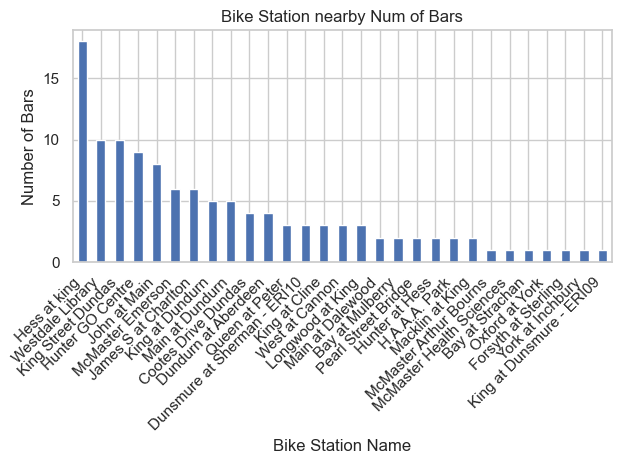

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use Seaborn style
sns.set(style='whitegrid')
counts = df['bike_station_name'].value_counts()
# Draw a bar diagram with the index on the x-axis
counts.plot(kind='bar')

plt.xticks(rotation=45, ha='right')
plt.title('Bike Station nearby Num of Bars')
plt.xlabel('Bike Station Name')
plt.ylabel('Number of Bars')

plt.tight_layout()
plt.show()

In [63]:
# Sorted DataFrame by "num_of_bikes" in DESC order
df_test = combine_with_bike_station_info(bike_info[:50], 'Restaurants', radis="200")
df_sorted = df_test.sort_values(by='num_of_bikes', ascending=False)

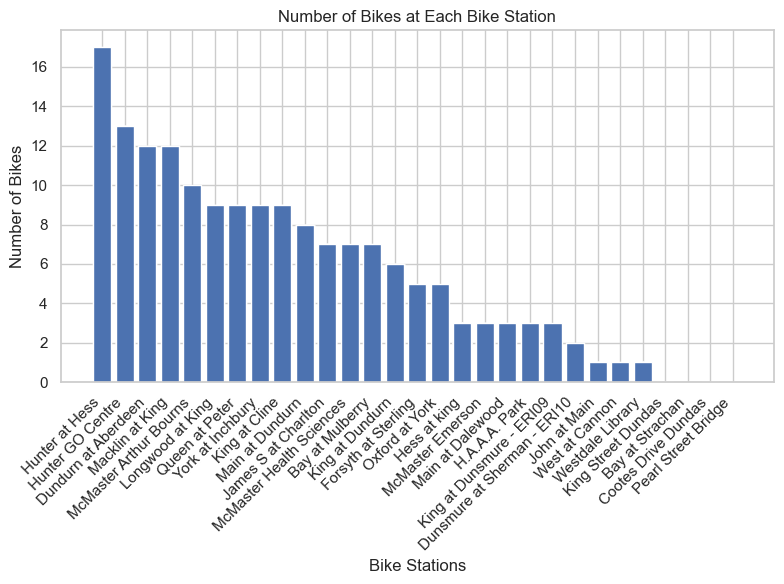

In [64]:
# Plot the bar diagram
plt.figure(figsize=(8, 6))
plt.bar(df_sorted['bike_station_name'], df_sorted['num_of_bikes'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Bike Stations')
plt.ylabel('Number of Bikes')
plt.title('Number of Bikes at Each Bike Station')
plt.tight_layout()
plt.show()

From the above bar diagrams, it seems like there is a linear relation between the number of bars and the number of bikes. The more bars near the bike station, the more bikes there. 

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [82]:
import sqlite3
import pandas as pd

data_raw_df = pd.read_csv('data_raw.csv')
yelp_data_df = pd.read_csv('yelp_data.csv')
foursquare_data_df = pd.read_csv('foursquare_data.csv')
bike_data_df = pd.read_csv('bike_data.csv')

# Create a connection to the SQLite database 
db_file_path = "/Users/Yu/Documents/GitHub/Statistical-Modelling-Project/my_database.db"
conn = sqlite3.connect(db_file_path)

# Store DataFrame in the database as a table
data_raw_df.to_sql('data_raw_table', conn, if_exists='replace', index=False)
yelp_data_df.to_sql('yelp_data_table', conn, if_exists='replace', index=False)
foursquare_data_df.to_sql('foursquare_data_table', conn, if_exists='replace', index=False)
bike_data_df.to_sql('bike_data_table', conn, if_exists='replace', index=False)

conn.close()


Look at the data before and after the join to validate your data.

In [85]:
# Inspect data before joining
print(yelp_data_df.head(5))
print(foursquare_data_df.head(5))
print(bike_data_df.head(5))

                                 name  yelp_latitude  yelp_longitude  \
0        Hot Stone Pizza and Shawarma      43.258270      -79.843840   
1  Giuseppe's Italian Cuisine & Pizza      43.251340      -79.844675   
2                       Mendonça Café      43.259220      -79.846234   
3                         sams tavern      43.256802      -79.838188   
4               Queen's Pizza & Wings      43.251130      -79.841230   

              yelp_address  
0  524 Barton Street ENone  
1        762 King Street E  
2      457 Barton Street E  
3      632 Barton Street E  
4        838 King Street E  
                                 name  foursquare_latitude  \
0        DeRosa Bakery and Restaurant            43.253411   
1                Starpolskie Delicacy            43.256666   
2                         Hello Baked            43.257945   
3             541 | Eatery & Exchange            43.258283   
4  Giuseppe's Italian Cuisine & Pizza            43.251383   

   foursquare_longit

In [88]:
# perform the join
merged_df = pd.concat([yelp_data_df, foursquare_data_df, bike_data_df], axis =1)
print(merged_df)

                                   name  yelp_latitude  yelp_longitude  \
0          Hot Stone Pizza and Shawarma      43.258270      -79.843840   
1    Giuseppe's Italian Cuisine & Pizza      43.251340      -79.844675   
2                         Mendonça Café      43.259220      -79.846234   
3                           sams tavern      43.256802      -79.838188   
4                 Queen's Pizza & Wings      43.251130      -79.841230   
..                                  ...            ...             ...   
140                                 NaN            NaN             NaN   
141                                 NaN            NaN             NaN   
142                                 NaN            NaN             NaN   
143                                 NaN            NaN             NaN   
144                                 NaN            NaN             NaN   

                yelp_address                                name  \
0    524 Barton Street ENone        DeRosa 

In [89]:
print(data_raw_df)

    bike_station_name  num_of_bikes                       restaurant_name  \
0        Hess at king             3          Coop Wicked Chicken Hamilton   
1        Hess at king             3                         Coop Hamilton   
2        Hess at king             3                              Papagayo   
3        Hess at king             3                          The Moghul's   
4        Hess at king             3  Island Carribbean Takeout & Catering   
..                ...           ...                                   ...   
114      John at Main             1                        Sankofa Dining   
115      John at Main             1                          Burrito Boyz   
116      John at Main             1                        Domino's Pizza   
117      John at Main             1                          Bad & Boujee   
118      John at Main             1                           Pizza Pizza   

    foursquare_address          yelp_address  
0        274 King St W      

The difference between merged_df and data_raw_df mainly because the radis is different. For the mergered_df, the radis is 500m while the number is 200m in data_raw_df. For each bike station, it has many bars or restaurants nearby, it takes too much time to run. As thus, I decreased it to 200m.